In [46]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import numpy as np

In [47]:
## Let's start by loading our data

# Starting with the labels
with open("./data/processed_training_labels.csv") as labels_file:
    labels_string = labels_file.read()
    labels = np.array(labels_string.split(','), dtype=int)
    
# Recall we had 60000 images. Let's make sure we didn't lose anythin
assert len(labels) == 60000

# Now for the images
images = []
with open("./data/processed_training_images") as images_file:
    raw_image_strings = images_file.readlines()
    for img_string in raw_image_strings:
        img_flat = np.array(img_string.split(","), dtype=np.double)
        img = np.reshape(img_flat, (28,28))
        images.append(img)
        
# Again, let's do some random spot checking to make sure everything is as we expect
assert len(images) == 60000
i1,i2,i3 = np.random.randint(0, 60000, 3)
assert images[i1].shape == (28,28)
assert images[i2].shape == (28,28)
assert images[i3].shape == (28,28)

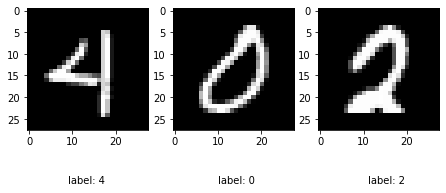

In [48]:
# And again, we'll just print out some images and their labels for good measure 
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10,10))
fig.add_subplot(1,4,1)
plt.text(9,40,f"label: {labels[i1]}")
plt.imshow(images[i1], cmap='gray')
fig.add_subplot(1,4,2)
plt.text(10,40,f"label: {labels[i2]}")
plt.imshow(images[i2], cmap='gray')
fig.add_subplot(1,4,3)
plt.text(11,40,f"label: {labels[i3]}")
plt.imshow(images[i3], cmap='gray')

In [84]:
## Okay! Now the fun begins.
# To start, let's just get everything over to Torch
train_labels = torch.tensor(labels).to('cuda:0')
train_images = torch.tensor(images).to('cuda:0')

# Let's convert them to the shape we need
t_images = train_images.reshape((60000,1,784)).float()

In [89]:
# And we can take a look at their shapes
print(t_labels.shape)
print(t_images.shape)
len(t_images)
t_labels = torch.zeros(60000, 10).to('cuda:0')
for i, l in enumerate(labels):
    t_labels[i][l] = 1

torch.Size([60000, 10])
torch.Size([60000, 1, 784])


In [92]:
# TODO: !DF! Try just one fully connected layer
# TODO: !DF! Write explanation on MSELoss()
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv1d(1,1,3)
        self.fc1 = nn.Linear(782, 80)
        self.fc2 = nn.Linear(80, 10)
        
    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.relu(self.fc1(x))
        return self.fc2(x)

In [93]:
net = Net()
net = net.to('cuda:0')
#net = net.float()
USE_GPU = True

#if USE_GPU:
    ##device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    #t_labels = t_labels.to(device)
    #t_images = t_images.to(device)
    #net = net.to(device)

In [94]:
criterion = nn.MSELoss().to('cuda:0')
#optimizer = optim.SGD(net.parameters(), lr=0.01)
for epoch in range(3):
    running_loss = 0.0
    for i in range(0,len(t_images), 4):
        #raw_batch = t_images[i:i+4]
        #batch = torch.zeros(4,1,784).to('cuda:0')
        #for j, img in enumerate(raw_batch):
            #batch[j] = img.flatten().double()
        #batch_labels = t_labels[i:i+4]
        #targets = torch.zeros(len(batch_labels),10).to('cuda:0')
        #for k,t in enumerate(targets):
            #label = batch_labels[k]
            #t[label] = 1
        
        #batch = batch.to(device)
        #targets = targets.to(device)
        net.zero_grad()
        out = net(t_images[i:i+4])
        loss = criterion(out, t_labels[i:i+4])
        loss.backward()
        running_loss += loss.item()
        if i % 2000 == 0:
            ## I recommend doing things like this. It helped me catch mistakes
            #print(batch[0][0])
            #plt.imshow(batch[0][0].reshape((28,28)), cmap='gray')
            #plt.show()
            #print(targets[0])
            print(f"Epoch: {epoch}, Batch: {i}, running_loss: {running_loss}")
            running_loss = 0.0
        for f in net.parameters():
            f.data.sub_(f.grad.data * 0.01)
        
    

Epoch: 0, Batch: 0, running_loss: 210.3797607421875
Epoch: 0, Batch: 2000, running_loss: 1343.5395960435271
Epoch: 0, Batch: 4000, running_loss: 45.325023271143436
Epoch: 0, Batch: 6000, running_loss: 45.015405997633934
Epoch: 0, Batch: 8000, running_loss: 45.01344175636768
Epoch: 0, Batch: 10000, running_loss: 44.98749636858702
Epoch: 0, Batch: 12000, running_loss: 45.01728831976652
Epoch: 0, Batch: 14000, running_loss: 45.00252152979374
Epoch: 0, Batch: 16000, running_loss: 45.00426197052002
Epoch: 0, Batch: 18000, running_loss: 44.97360632568598
Epoch: 0, Batch: 20000, running_loss: 45.014309741556644
Epoch: 0, Batch: 22000, running_loss: 45.000772409141064
Epoch: 0, Batch: 24000, running_loss: 45.01628389954567
Epoch: 0, Batch: 26000, running_loss: 44.985598266124725
Epoch: 0, Batch: 28000, running_loss: 45.01908699423075
Epoch: 0, Batch: 30000, running_loss: 45.0136511400342
Epoch: 0, Batch: 32000, running_loss: 44.989374935626984
Epoch: 0, Batch: 34000, running_loss: 45.008496306

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

In [ ]:
plt.imshow(t_images[2], cmap='gray')

In [10]:
torch.argmax(net(t_images[2].flatten().float().unsqueeze(0).unsqueeze(0)))

tensor(4, device='cuda:0')

In [15]:
with open("./data/processed_testing_labels.csv") as labels_file:
    labels_string = labels_file.read()
    testing_labels = np.array(labels_string.split(','), dtype=int)
    
# Recall we had 60000 images. Let's make sure we didn't lose anythin
assert len(testing_labels) == 10000

# Now for the images
testing_images = []
with open("./data/processed_testing_images") as images_file:
    raw_image_strings = images_file.readlines()
    for img_string in raw_image_strings:
        img_flat = np.array(img_string.split(","), dtype=np.double)
        img = np.reshape(img_flat, (28,28))
        testing_images.append(img)

In [23]:
t_test_labels = torch.tensor(testing_labels).to('cuda:0')
t_test_images = torch.tensor(testing_images).to('cuda:0')
t_test_images = t_test_images.reshape(10000, 784).float()

In [24]:
correct = []
for i,img in enumerate(t_test_images):
    res = torch.argmax(net(img.unsqueeze(0).unsqueeze(0)))
    targ = t_test_labels[i]
    if res == targ:
        correct.append(1)
    else:
        correct.append(0)

print(f"{sum(correct)} / {len(correct)}")

8291 / 10000


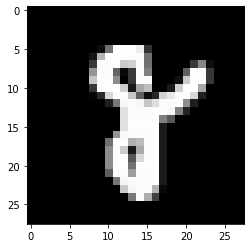

In [27]:
img = t_test_images[9496].cpu().reshape(28,28)
plt.imshow(img, cmap='gray')

In [30]:
torch.argmax(net(img.flatten().float().unsqueeze(0).unsqueeze(0).cuda()))

tensor(8, device='cuda:0')

In [ ]:
img.shape

In [ ]:
img.flatten().shape

In [32]:
t_labels.reshape(60000, 10)

RuntimeError: shape '[60000, 10]' is invalid for input of size 60000

In [37]:
t_images.reshape((60000, 784))[0] == t_images.flatten().reshape((60000, 784))

tensor([[True, True, True,  ..., True, True, True],
        [True, True, True,  ..., True, True, True],
        [True, True, True,  ..., True, True, True],
        ...,
        [True, True, True,  ..., True, True, True],
        [True, True, True,  ..., True, True, True],
        [True, True, True,  ..., True, True, True]], device='cuda:0')

In [70]:
t_labels[1:3].reshape(2,1).shape

torch.Size([2, 1])

In [91]:
t_labels[0]

tensor([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], device='cuda:0')